### Figure 4C

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "arial"
from numpy import inf

In [2]:
### import the reads mapping file in blast format
### reads from P1, PST and SST were blasted against P1_MAG1
input = 'data/Figure4C'
P1_MAG1 = pd.read_csv(input + '/P1/vs2-pass2-MAG-1.blst',sep='\t',header=None)
PST_MAG1 = pd.read_csv(input + '/PST/vs2-pass2-MAG-1.blst',sep='\t',header=None)
SST_MAG1 = pd.read_csv(input + '/SST/vs2-pass2-MAG-1.blst',sep='\t',header=None)

print(PST_MAG1.shape)
print(SST_MAG1.shape)
print(P1_MAG1.shape)


(251, 16)
(12, 16)
(217368, 16)


In [3]:
def seq_count(df):
    Final = np.zeros(46095)
    for i in range(df.shape[0]):
        start = df.iloc[i,8]
        end = df.iloc[i,9]
        MIN = min(start,end)
        MAX = max(start,end)
        A = np.repeat([0],MIN-1)
        B = np.repeat([1],MAX-MIN+1)
        C = np.repeat([0],46095-MAX)
        SUM = np.concatenate([A, B, C], axis=0)
        Final = Final + SUM
    return Final

In [4]:
#with open('P1_seq.npy','wb') as f:
#    np.save(f,p1_seq)
#p1_seq = seq_count(P1_MAG1) # since it will process for a long time, so I store the processed file (p1_seq) in data directory
p1_seq = np.load('data/Figure4C/P1_seq.npy')

## calculate mean coverage
print(p1_seq.sum()/46095)
pst_seq = seq_count(PST_MAG1)
print(pst_seq.sum()/46095)
sst_seq = seq_count(SST_MAG1)
print(sst_seq.sum()/46095)

1136.2290920924179
1.264497233973316
0.04197852261633583


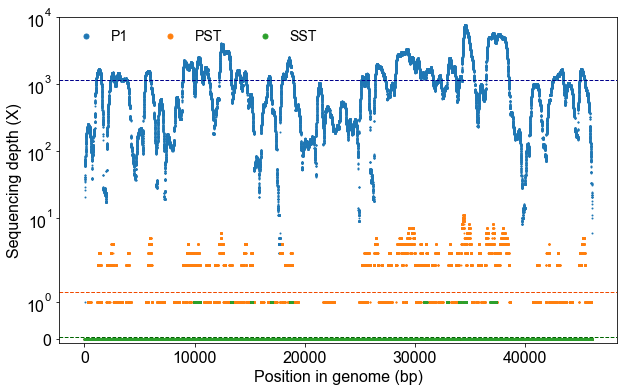

In [5]:
#plt.figure(, dpi=300)
a = p1_seq.sum()/46095
b = pst_seq.sum()/46095
c = sst_seq.sum()/46095

x = [*range(46095)]
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x, p1_seq, s=1, label='P1')
plt.axhline(y=a, linestyle='--', linewidth=1, color='#00008B')
plt.scatter(x, pst_seq, s=1, label='PST')
plt.axhline(y=b, linestyle='--', linewidth=1, color='#F04A00')
plt.scatter(x, sst_seq, s=1, label='SST')
plt.axhline(y=c, linestyle='--', linewidth=1, color='#006400')
plt.legend(fontsize=14, markerscale=5, loc='upper left', frameon=False, ncol=3)
plt.xlabel('Position in genome (bp)', fontsize=16)
plt.ylabel('Sequencing depth (X)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('symlog') ### symlog scale has been used since it contains the 0 value
plt.ylim([-0.1,10000])
plt.savefig('plots/Figure4C.recruitmentplots.pdf', dpi=100)
